### Example taken from : https://towardsdatascience.com/announcing-pycaret-an-open-source-low-code-machine-learning-library-in-python-4a1f1aad8d46

### Also check out the other examples on GitHub: https://github.com/pycaret/pycaret/tree/master/Tutorials

# 1.0 Getting the data

In [1]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2.0 Setting the Environment

In [3]:
from pycaret.classification import *
exp1 = setup(diabetes, target = 'Class variable')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4367
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# 3. Compare Models

In [4]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.769000,0.834600,0.619900,0.694000,0.649500,0.479200
1,CatBoost Classifier,0.767300,0.834800,0.630700,0.686000,0.652300,0.478800
2,Logistic Regression,0.765600,0.807200,0.588600,0.700500,0.637700,0.466300
3,Linear Discriminant Analysis,0.750800,0.814200,0.556700,0.681700,0.609800,0.429500
4,Ridge Classifier,0.748900,0.000000,0.551500,0.679500,0.605800,0.424600
5,Gradient Boosting Classifier,0.748600,0.822700,0.593300,0.663400,0.621400,0.435200
6,Light Gradient Boosting Machine,0.748500,0.814400,0.629800,0.648000,0.635900,0.444400
7,Extra Trees Classifier,0.739500,0.803800,0.513700,0.684000,0.578800,0.396400
8,Ada Boost Classifier,0.726200,0.790500,0.555800,0.622200,0.584700,0.382100
9,K Neighbors Classifier,0.716800,0.739400,0.506700,0.618600,0.551600,0.349000


# 4. Create Model

In [6]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7963,0.8226,0.5263,0.8333,0.6452,0.5123
1,0.7037,0.7639,0.4211,0.6154,0.5000,0.2998
2,0.8148,0.8902,0.7368,0.7368,0.7368,0.5940
3,0.7593,0.8481,0.6316,0.6667,0.6486,0.4658
4,0.8333,0.8977,0.6842,0.8125,0.7429,0.6209
5,0.6852,0.7398,0.6842,0.5417,0.6047,0.3489
6,0.8148,0.8692,0.7368,0.7368,0.7368,0.5940
7,0.7170,0.7794,0.5000,0.6000,0.5455,0.3424
8,0.7547,0.8159,0.6111,0.6471,0.6286,0.4457
9,0.8113,0.9190,0.6667,0.7500,0.7059,0.5677


In [9]:
xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=4367,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

# 5. Tune Model

In [7]:
tuned_xgboost = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7037,0.8203,0.4211,0.6154,0.5000,0.2998
1,0.6852,0.7774,0.3684,0.5833,0.4516,0.2463
2,0.7222,0.8135,0.5789,0.6111,0.5946,0.3836
3,0.7037,0.8271,0.5263,0.5882,0.5556,0.3344
4,0.7963,0.8549,0.5263,0.8333,0.6452,0.5123
5,0.6296,0.6699,0.5263,0.4762,0.5000,0.2070
6,0.7593,0.8015,0.6316,0.6667,0.6486,0.4658
7,0.7358,0.7730,0.5556,0.6250,0.5882,0.3948
8,0.7358,0.7698,0.5000,0.6429,0.5625,0.3775
9,0.8491,0.9476,0.7778,0.7778,0.7778,0.6635


In [8]:
tuned_xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.33, max_delta_step=0, max_depth=50,
              min_child_weight=4, missing=None, n_estimators=400, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=4367,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.1, verbosity=0)

### **In this case, it did not improve the result but tunuing looks at a random grid to find best parameters.**

# 6. Ensemble Model

In [10]:
# creating a decision tree model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7593,0.7301,0.6316,0.6667,0.6486,0.4658
1,0.7778,0.7684,0.7368,0.6667,0.7000,0.5242
2,0.7037,0.6511,0.4737,0.6000,0.5294,0.3175
3,0.6481,0.6444,0.6316,0.5000,0.5581,0.2723
4,0.7963,0.7707,0.6842,0.7222,0.7027,0.5479
5,0.6852,0.6850,0.6842,0.5417,0.6047,0.3489
6,0.7778,0.7684,0.7368,0.6667,0.7000,0.5242
7,0.6604,0.6349,0.5556,0.5000,0.5263,0.2628
8,0.6226,0.5659,0.3889,0.4375,0.4118,0.1354
9,0.5660,0.5095,0.3333,0.3529,0.3429,0.0193


In [12]:
# ensembling a trained dt model
dt_bagged = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7593,0.7466,0.4737,0.7500,0.5806,0.4236
1,0.6852,0.6985,0.4211,0.5714,0.4848,0.2656
2,0.8148,0.8556,0.6316,0.8000,0.7059,0.5735
3,0.7222,0.7880,0.5263,0.6250,0.5714,0.3682
4,0.7037,0.7639,0.5263,0.5882,0.5556,0.3344
5,0.6667,0.7368,0.6842,0.5200,0.5909,0.3184
6,0.7778,0.8511,0.7368,0.6667,0.7000,0.5242
7,0.7547,0.7444,0.5000,0.6923,0.5806,0.4136
8,0.7170,0.7952,0.5000,0.6000,0.5455,0.3424
9,0.8302,0.8429,0.5556,0.9091,0.6897,0.5819


### **PyCaret also provide [blend_models](https://pycaret.org/blend-models/) and [stack_models](https://pycaret.org/stack-models/) functionality to ensemble multiple trained models.**

# 7. Plot Model

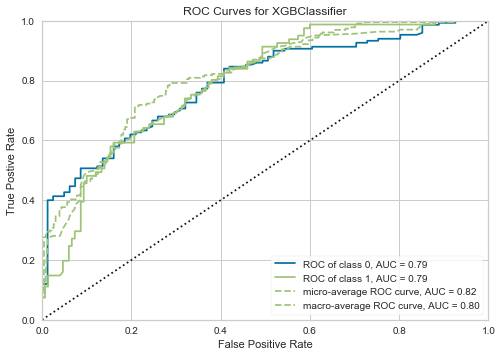

In [14]:
# AUC plot
plot_model(tuned_xgboost, plot = 'auc')

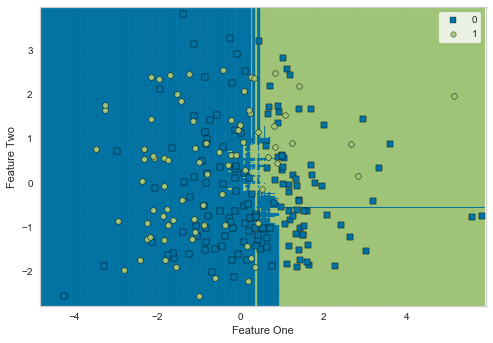

In [15]:
# Decision Boundary
plot_model(tuned_xgboost, plot = 'boundary')

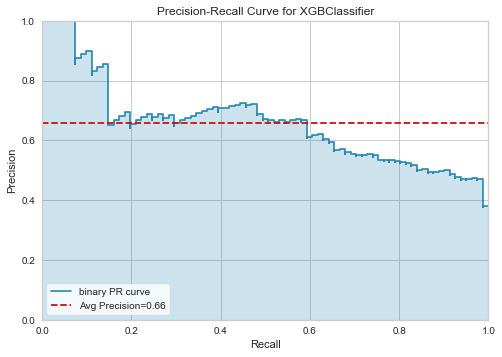

In [16]:
# Precision Recall Curve
plot_model(tuned_xgboost, plot = 'pr')

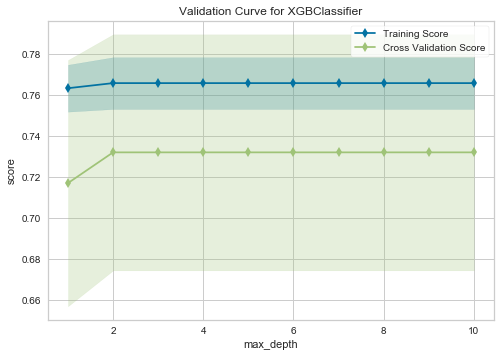

In [17]:
# Validation Curve
plot_model(tuned_xgboost, plot = 'vc')

In [18]:
evaluate_model(xgboost)

,Parameters
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,1
gamma,0
learning_rate,0.1
max_delta_step,0
max_depth,3
min_child_weight,1


# 8. Interpret Model

### PyCaret implements SHAP (SHapley Additive exPlanations) using interpret_model function.

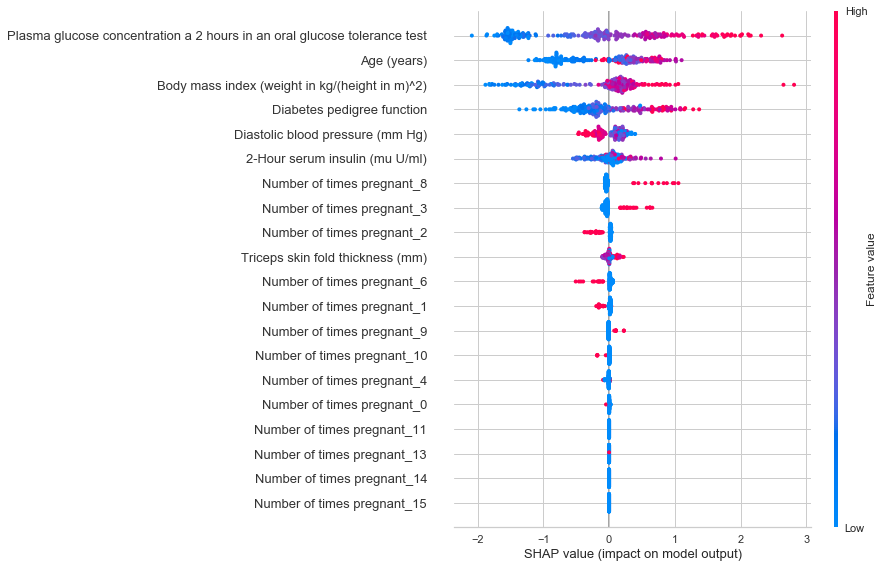

In [19]:
# summary plot
interpret_model(xgboost)

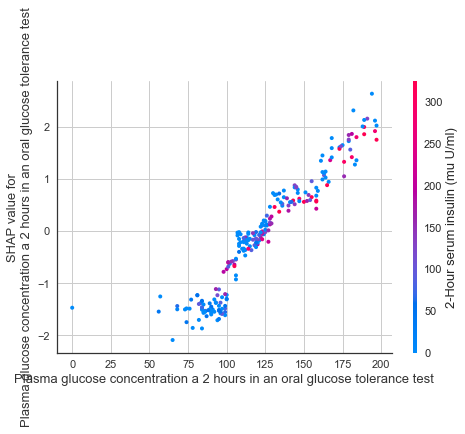

In [20]:
# correlation plot
interpret_model(xgboost, plot = 'correlation')

### Interpretation of a particular datapoint (also known as reason argument) in the test dataset can be evaluated using ‘reason’ plot. In the below example we are checking the first instance in our test dataset.

In [21]:
interpret_model(xgboost, plot = 'reason', observation = 0) 

# 9. Predict Model

### So far the results we have seen are based on k-fold cross validation on training dataset only (70% by default). In order to see the predictions and performance of the model on the test / hold-out dataset, the predict_model function is used.

In [23]:
# predict test / hold-out dataset
xgb_holdout_pred = predict_model(xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.7749,0.824,0.6173,0.7042,0.6579,0.4912


### predict_model function is also used to predict unseen dataset. For now, we will use the same dataset we have used for training as a proxy for new unseen dataset. In practice, predict_model function would be used iteratively, every time with a new unseen dataset.

In [25]:
predictions = predict_model(xgboost, data = diabetes)
predictions.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.8468
1,1,85,66,29,0,26.6,0.351,31,0,0,0.0415
2,8,183,64,0,0,23.3,0.672,32,1,1,0.9062
3,1,89,66,23,94,28.1,0.167,21,0,0,0.0230
4,0,137,40,35,168,43.1,2.288,33,1,1,0.8779


# 10. Deploy Model

### One way to utilize the trained models to generate predictions on an unseen dataset is by using the predict_model function in the same notebooks / IDE in which model was trained. However, making the prediction on an unseen dataset is an iterative process; depending on the use-case, the frequency of making predictions could be from real time predictions to batch predictions. PyCaret’s deploy_model function allows deploying the entire pipeline including trained model on cloud from notebook environment.

In [26]:
# deploy_model(model = rf, model_name = 'rf_aws', platform = 'aws', 
#              authentication =  {'bucket'  : 'pycaret-test'})

# 11. Save Model / Save Experiment

### Once training is completed the entire pipeline containing all preprocessing transformations and trained model object can be saved as a binary pickle file.

In [27]:
# saving model
save_model(xgboost, model_name = 'xgb_for_deployment')

Transformation Pipeline and Model Succesfully Saved


### You can also save the entire experiment consisting of all intermediary outputs as one binary file.

In [28]:
save_experiment(experiment_name = 'my_first_experiment')

Experiment Succesfully Saved


### You can load saved model and saved experiment using `load_model` and `load_experiment` function available in all modules of PyCaret.